In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Inspecting the dataset

In [2]:
df=pd.read_csv('police.csv')
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [4]:
df.describe(include = 'object')

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_type,stop_outcome,is_arrested,stop_duration,district
count,91741,91741,91741,86536,86539,86539,86539,3307,86539,86539,86539,91741
unique,1,3757,1431,2,5,12,6,25,6,2,3,6
top,RI,2007-05-16,11:00,M,White,Speeding,Speeding,Incident to Arrest,Citation,False,0-15 Min,Zone X4
freq,91741,63,358,62762,61872,48424,48424,1290,77092,83461,69579,24279


# Data Cleaning

### Removing the state column as it has only one unique value

In [5]:
df.drop('state',axis=1,inplace=True)

### Checking for null values

In [6]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

### Removing the county_name column as it has 100% null values and the search_type as it has more than 90% null values

In [7]:
df.drop(['county_name','search_type'],axis=1,inplace=True)

### Removing the rest of null values

In [8]:
df.dropna(inplace=True)

### Checking for duplicates

In [9]:
df.duplicated().any()

True

In [10]:
df.drop_duplicates(inplace=True)

### Concatenating the stop_date and stop_time into a single datetime column

In [11]:
df['stop_datetime']=df['stop_date'].str.cat(df['stop_time'],sep=' ')
df['stop_datetime']

0        2005-01-04 12:55
1        2005-01-23 23:15
2        2005-02-17 04:15
3        2005-02-20 17:15
4        2005-02-24 01:20
               ...       
91736    2015-12-31 21:21
91737    2015-12-31 21:59
91738    2015-12-31 22:04
91739    2015-12-31 22:09
91740    2015-12-31 22:47
Name: stop_datetime, Length: 86172, dtype: object

### Checking for data types

In [12]:
df.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
stop_datetime         object
dtype: object

In [13]:
df['stop_datetime']=pd.to_datetime(df['stop_datetime'])

In [14]:
df.set_index('stop_datetime', inplace=True)  #setting the stop_datetime column as the index for dataframe

In [15]:
df['driver_gender']=df['driver_gender'].astype('category')

In [16]:
df['driver_race']=df['driver_race'].astype('category')

In [17]:
df['is_arrested']=df['is_arrested'].astype('bool')

In [18]:
df['drugs_related_stop']=df['drugs_related_stop'].astype('bool')

In [19]:
df['search_conducted']=df['search_conducted'].astype('bool')

In [78]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}  #Converting the stop_duration column to numerical values to help in analysis
df['stop_duration']=df.stop_duration.map(mapping)

# EDA

### Distribution of violation types

Text(0.5, 1.0, 'Distribution of violation types')

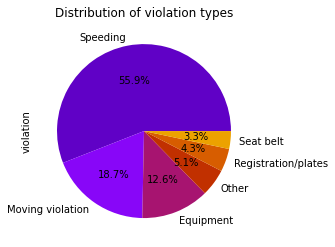

In [20]:
df['violation'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('gnuplot'))
plt.title('Distribution of violation types')

### Does the gender of the driver correlate with getting a speeding violation?

In [21]:
speeding_violation_df=df[df.violation=='Speeding']
speeding_violation_df['driver_gender'].value_counts(normalize=True)

M    0.676602
F    0.323398
Name: driver_gender, dtype: float64

#### About 70% of drivers who got a speeding violation ticket are males,indicating a potential gender disparity in speeding behaviors

### Does the gender of the driver correlate with being arrested?

In [22]:
arrested_drivers_df=df[df.is_arrested==True]
arrested_drivers_df['driver_gender'].value_counts(normalize=True)

M    0.78278
F    0.21722
Name: driver_gender, dtype: float64

#### it's clear that around 80% of the individuals who have been arrested are males. This suggests a notable gender imbalance in the arrest rates, indicating that men are more likely to be arrested compared to women

### Does the gender of the driver correlate with being searched?

In [30]:
df.groupby('driver_gender')['search_conducted'].mean()

driver_gender
F    0.019200
M    0.045459
Name: search_conducted, dtype: float64

### Is there a correlation between traffic stops involving drugs and number of arrests?

In [31]:
drugs_arrested_mean = df.groupby('drugs_related_stop')['is_arrested'].mean()
print("Non-related stops:")
print(drugs_arrested_mean[False])

print("Related stops:")
print(drugs_arrested_mean[True])

Non-related stops:
0.03297231403989966
Related stops:
0.2680652680652681


#### This suggests a potentially heightened level of law enforcement action in instances involving suspected drug activity during traffic stops.

### What is the distribution of violations according to each stop_outcome?

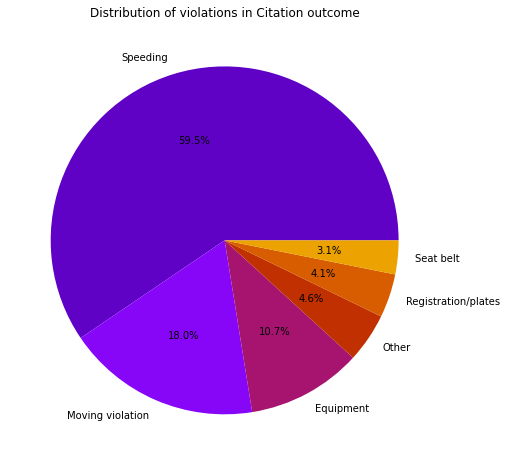

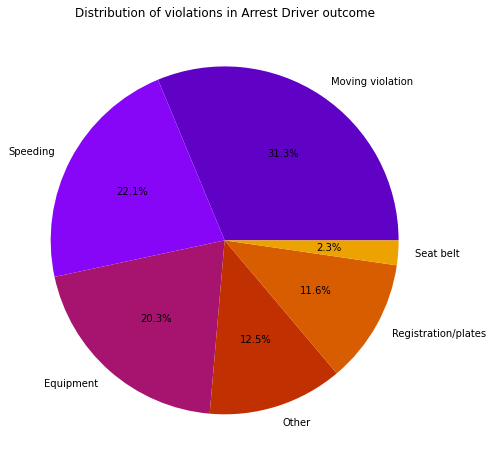

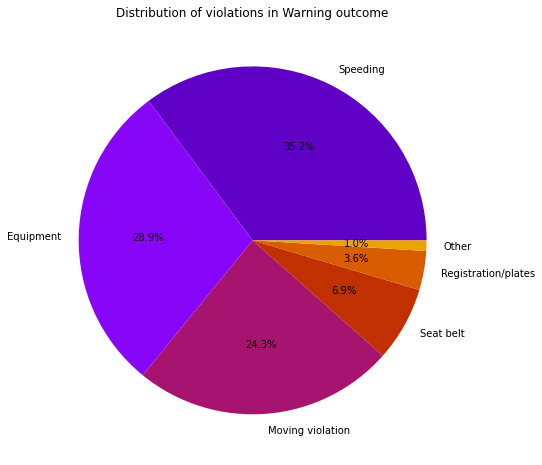

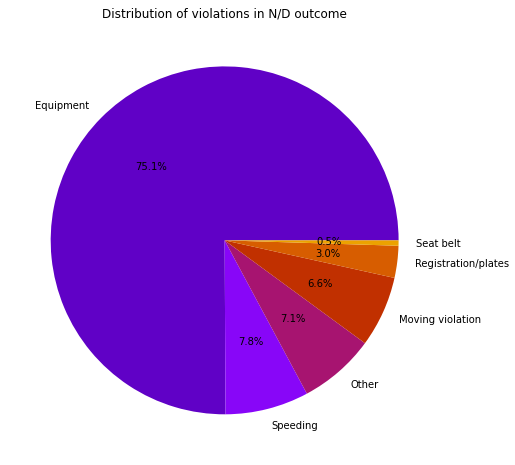

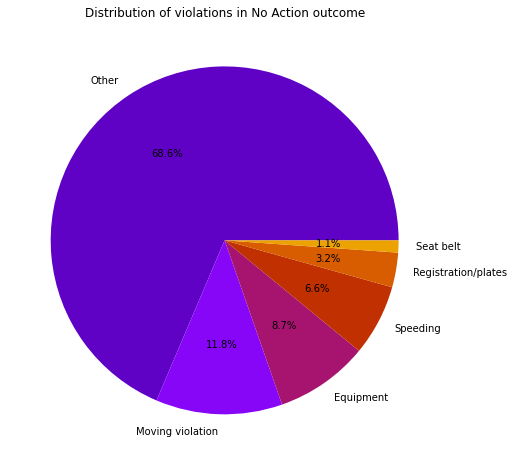

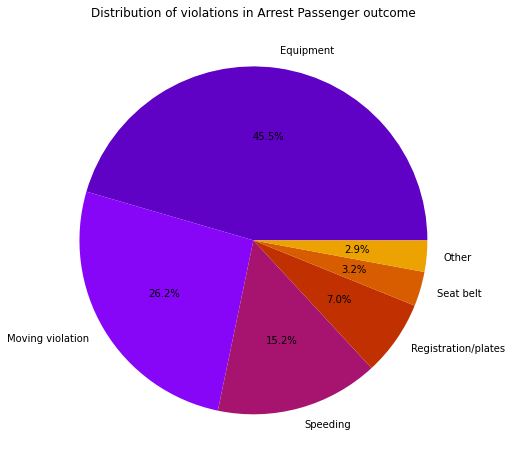

In [58]:
def plot_violation_distribution_per_stop_outcome(df):
  unique_stop_outcomes = df['stop_outcome'].unique()

  # Iterate through unique stop_outcomes
  for outcome in unique_stop_outcomes:
    
    violation_frequency_per_outcome = (df[df['stop_outcome'] == outcome]
                                      ['violation'].value_counts().sort_values(ascending=False))

    # Create a pie chart for the current stop_outcome
    plt.figure(figsize=(8, 8))  
    plt.title(f'Distribution of violations in {outcome} outcome')
    plt.pie(violation_frequency_per_outcome, labels=violation_frequency_per_outcome.index, autopct="%1.1f%%",colors=sns.color_palette('gnuplot'))
    

plot_violation_distribution_per_stop_outcome(df)


### Is there a variation in the drivers arrest rate in different districts?

Text(0, 0.5, 'Arrest rate')

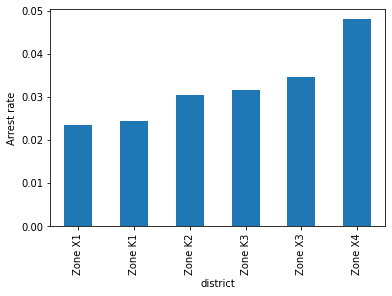

In [57]:
df.groupby('district').is_arrested.mean().sort_values().plot(kind='bar')
plt.ylabel('Arrest rate')

### What is the rate of being searched in each violation type?

Text(0.5, 0, 'the rate of being searched')

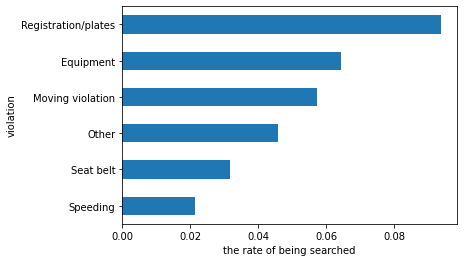

In [67]:
df.groupby('violation')['search_conducted'].mean().sort_values().plot(kind='barh')
plt.xlabel('the rate of being searched')

### How the number of traffic stops changed each year?

Text(0, 0.5, 'Number of stops')

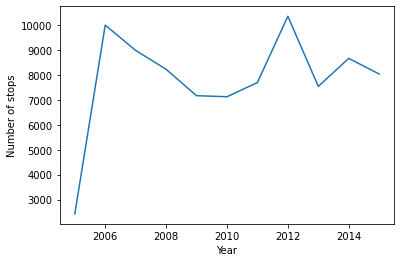

In [34]:
df.groupby(df.index.year)['violation'].count().plot()
plt.xlabel('Year')
plt.ylabel('Number of stops')

### How the number of drug-related traffic stops changed each year?

Text(0, 0.5, 'Number of drug-related stops')

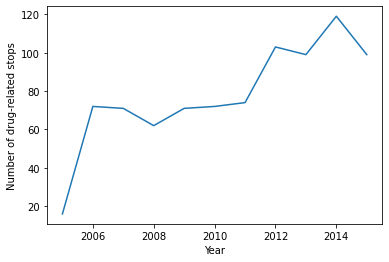

In [62]:
drug_related_df=df[df['drugs_related_stop']==True]
drug_related_df.groupby(drug_related_df.index.year)['violation'].count().plot()
plt.xlabel('Year')
plt.ylabel('Number of drug-related stops')

### What is the average stop duration of each violation?

Text(0.5, 0, 'Average stop duration')

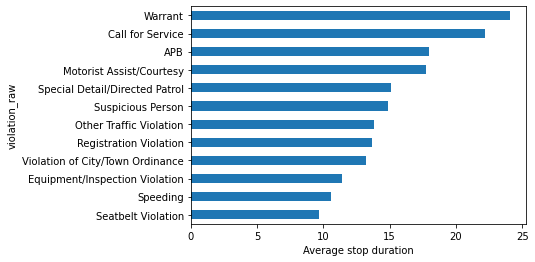

In [69]:
df.groupby('violation_raw')['stop_duration'].mean().sort_values().plot(kind='barh')
plt.xlabel('Average stop duration')

### How the average stop_duration in each time of the day?

<AxesSubplot:xlabel='time'>

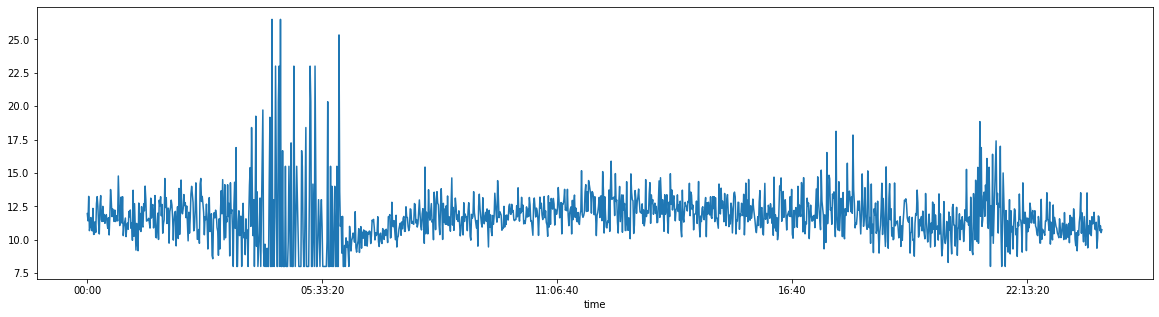

In [77]:
df.groupby(df.index.time)['stop_duration'].mean().sort_values().plot(figsize=(20,5))